In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
pip install xgboost

Choose a model to run:
1. Fully Connected Neural Network
2. LSTM
3. K-Nearest Neighbors
4. Logistic Regression
5. Support Vector Machine
6. Random Forest
7. Naive Bayes
8. Simple CART
9. XGBoost
10. CATBoost
11. Summarize
Enter the number of the model you want to run: 11
Epoch 1/200
16/16 [==============================] - 2s 30ms/step - loss: 0.6265 - accuracy: 0.6558 - val_loss: 0.6303 - val_accuracy: 0.6585
Epoch 2/200
16/16 [==============================] - 0s 8ms/step - loss: 0.5583 - accuracy: 0.7169 - val_loss: 0.5716 - val_accuracy: 0.6829
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5154 - accuracy: 0.7393 - val_loss: 0.5301 - val_accuracy: 0.6992
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4870 - accuracy: 0.7678 - val_loss: 0.5013 - val_accuracy: 0.7480
Epoch 5/200
16/16 [==============================] - 0s 9ms/step - loss: 0.4692 - accuracy: 0.7841 - val_loss: 0.4877 - val_accuracy: 0.7480
Epoch 6/200
16/16 [===

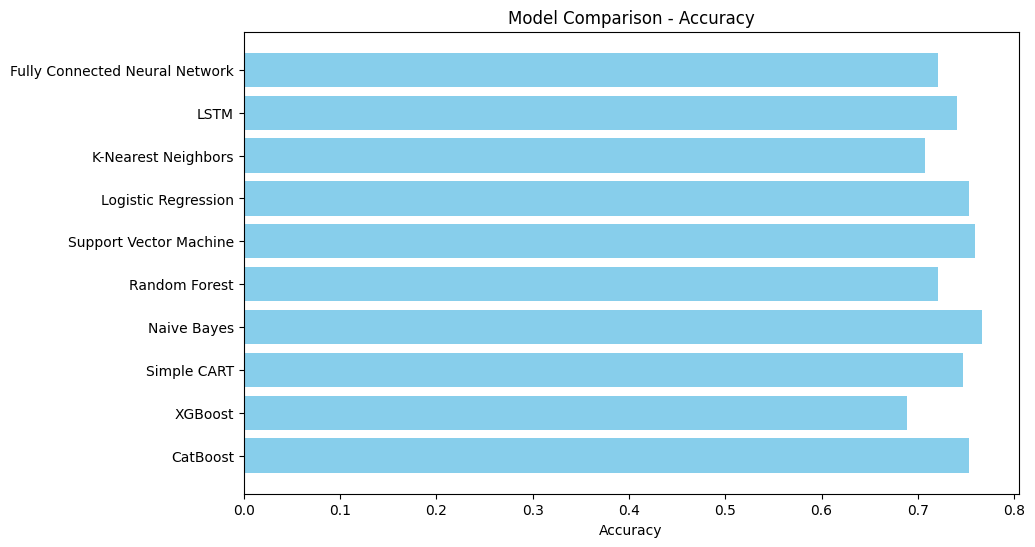

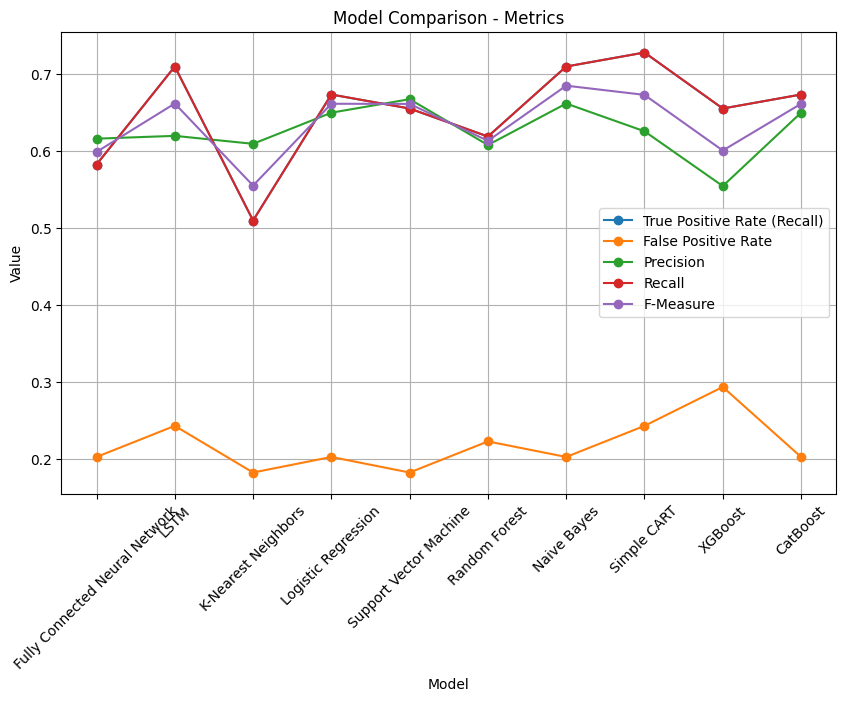

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the diabetes dataset from the CSV file
data = pd.read_csv("Diabetes_dataset.csv")
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Choose a model to run:")
print("1. Fully Connected Neural Network")
print("2. LSTM")
print("3. K-Nearest Neighbors")
print("4. Logistic Regression")
print("5. Support Vector Machine")
print("6. Random Forest")
print("7. Naive Bayes")
print("8. Simple CART")
print("9. XGBoost")
print("10. CATBoost")
print("11. Summarize")
model_choice = int(input("Enter the number of the model you want to run: "))

if model_choice == 1:
    # Fully Connected Neural Network
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=X_train_scaled.shape[1]))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    learning_rate = 0.001
    sgd_optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=sgd_optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(X_train_scaled, y_train, epochs=800, batch_size=32, validation_split=0.2)
    loss, accuracy = model.evaluate(X_test_scaled, y_test)

    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i][0])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Loss:", loss)
    print("Accuracy:", accuracy*100)

elif model_choice == 2:
    # LSTM
    model = Sequential()
    model.add(LSTM(64, activation="relu", input_shape=(1, X_train_scaled.shape[1])))
    model.add(Dense(1, activation="sigmoid"))
    learning_rate = 0.001
    adam_optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=adam_optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
    model.fit(X_train_reshaped, y_train, epochs=400, batch_size=32, validation_split=0.2)
    loss, accuracy = model.evaluate(X_test_reshaped, y_test)

    y_pred_prob = model.predict(X_test_reshaped)
    y_pred = (y_pred_prob > 0.5).astype(int)
    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i][0])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Loss:", loss)
    print("Accuracy:", accuracy*100)

elif model_choice == 3:
    # K-Nearest Neighbors
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Accuracy:", accuracy*100)

elif model_choice == 4:
    # Logistic Regression
    logistic_reg = LogisticRegression()
    logistic_reg.fit(X_train_scaled, y_train)
    y_pred = logistic_reg.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Accuracy:", accuracy*100)

elif model_choice == 5:
    # Support Vector Machine
    svm = SVC(kernel='linear')
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Accuracy:", accuracy*100)

elif model_choice == 6:
    # Random Forest Classifier
    random_forest = RandomForestClassifier(random_state=42)
    random_forest.fit(X_train_scaled, y_train)
    y_pred = random_forest.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Accuracy:", accuracy*100)

elif model_choice == 7:
    # Naive Bayes Classifier
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train_scaled, y_train)
    y_pred = naive_bayes.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Accuracy:", accuracy*100)

elif model_choice == 8:
    # Simple CART (Decision Tree) Classifier
    simple_cart = DecisionTreeClassifier(random_state=42)
    simple_cart.fit(X_train_scaled, y_train)
    y_pred = simple_cart.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Accuracy:", accuracy*100)


elif model_choice == 9:
    # XGBoost
    xgboost = XGBClassifier(random_state=42)
    xgboost.fit(X_train_scaled, y_train)
    y_pred = xgboost.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Accuracy:", accuracy*100)

elif model_choice == 10:
    # CatBoost
    catboost = CatBoostClassifier(random_state=42)
    catboost.fit(X_train_scaled, y_train)
    y_pred = catboost.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print("Predictions:")
    for i in range(len(y_test)):
        print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i])
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1, 1]
    fp = conf_matrix[0, 1]
    tp_rate = tp / (tp + conf_matrix[1, 0])
    fp_rate = fp / (fp + conf_matrix[0, 0])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred)
    print("True Positive Rate (Recall):", tp_rate)
    print("False Positive Rate:", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Accuracy:", accuracy*100)

elif model_choice == 11:
    models = [
        ("Fully Connected Neural Network", Sequential([
            Dense(64, activation="relu", input_dim=X_train_scaled.shape[1]),
            Dense(32, activation="relu"),
            Dense(1, activation="sigmoid")
        ])),
        ("LSTM", Sequential([
            LSTM(64, activation="relu", input_shape=(1, X_train_scaled.shape[1])),
            Dense(1, activation="sigmoid")
        ])),
        ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3)),
        ("Logistic Regression", LogisticRegression()),
        ("Support Vector Machine", SVC(kernel='linear')),
        ("Random Forest", RandomForestClassifier(random_state=42)),
        ("Naive Bayes", GaussianNB()),
        ("Simple CART", DecisionTreeClassifier(random_state=42)),
        ("XGBoost", XGBClassifier(random_state=42)),
        ("CatBoost", CatBoostClassifier(random_state=42))
    ]

    model_names = [model[0] for model in models]
    accuracies = []
    tp_rates = []
    fp_rates = []
    precisions = []
    recalls = []
    f_measures = []

    for model_name, model in models:
        if "Neural Network" in model_name or "LSTM" in model_name:
            if "LSTM" in model_name:
                model.add(Dense(1, activation="sigmoid"))  # Add an output layer for LSTM
                learning_rate = 0.001
                adam_optimizer = Adam(learning_rate=learning_rate)
                model.compile(optimizer=adam_optimizer, loss="binary_crossentropy", metrics=["accuracy"])
                X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
                X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
                model.fit(X_train_reshaped, y_train, epochs=400, batch_size=32, validation_split=0.2)
                y_pred_prob = model.predict(X_test_reshaped)
                y_pred = (y_pred_prob > 0.5).astype(int)
            else:
                model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)
                y_pred_prob = model.predict(X_test_scaled)
                y_pred = (y_pred_prob > 0.5).astype(int)
        else:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        tp_rate = recall_score(y_test, y_pred)
        fp_rate = 1 - recall_score(y_test, y_pred, pos_label=0)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f_measure = f1_score(y_test, y_pred)

        accuracies.append(accuracy)
        tp_rates.append(tp_rate)
        fp_rates.append(fp_rate)
        precisions.append(precision)
        recalls.append(recall)
        f_measures.append(f_measure)

        print(f"Model: {model_name}")
        print("Accuracy:", accuracy * 100)
        print("True Positive Rate (Recall):", tp_rate)
        print("False Positive Rate:", fp_rate)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F-Measure:", f_measure)
        print("-" * 50)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, accuracies, color='skyblue')
    plt.xlabel('Accuracy')
    plt.title('Model Comparison - Accuracy')
    plt.gca().invert_yaxis()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(model_names, tp_rates, marker='o', label='True Positive Rate (Recall)')
    plt.plot(model_names, fp_rates, marker='o', label='False Positive Rate')
    plt.plot(model_names, precisions, marker='o', label='Precision')
    plt.plot(model_names, recalls, marker='o', label='Recall')
    plt.plot(model_names, f_measures, marker='o', label='F-Measure')
    plt.xlabel('Model')
    plt.ylabel('Value')
    plt.title('Model Comparison - Metrics')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


